In [1]:
using AlgebraicStockFlow

using Catlab
using Catlab.CategoricalAlgebra
using LabelledArrays
using OrdinaryDiffEq
using Plots

using Catlab.Graphics
using Catlab.Programs
using Catlab.WiringDiagrams

┌ Info: Precompiling AlgebraicStockFlow [58c4a0e8-2944-4d18-9fa2-e17726aee9e5]
└ @ Base loading.jl:1317


In [7]:
display_uwd(ex) = to_graphviz(ex, box_labels=:name, junction_labels=:variable, edge_attrs=Dict(:len=>"1"));

# Model A: Open population SIR model

In [2]:
# define the function of the dynamical variables
f_birth(u,uN,p,t)=p.rbirth*uN.N(u,t)
f_inf(u,uN,p,t)= p.cbeta*u.S*u.I/uN.N(u,t)
f_rec(u,uN,p,t)=p.rrecovery*u.I
f_deathS(u,uN,p,t)=u.S*p.rdeath
f_deathI(u,uN,p,t)=u.I*p.rdeath
f_deathR(u,uN,p,t)=u.R*p.rdeath

f_deathR (generic function with 1 method)

In [3]:
#(stock_name=>(inflows, outflows, variables, svariables))
     ## if a stock has no inflow or no outflow, use keyword ":F_NONE"
     ## if a stock has no variables connect to, use keyword ":V_NONE"
     ## if a stock has no sum_variables connect to, use keyword ":SV_NONE"
#(flow=>variable)
#(variable=>function)
#(svariable=>variable)
     ## if sum_variable contributes to no variables, use keywork ":SVV_NONE"
sir=StockAndFlow(
    (:S=>(:birth,(:inf,:deathS),(:v_inf,:v_deathS),:N), 
        :I=>(:inf,(:rec,:deathI),(:v_inf, :v_rec,:v_deathI),:N),
        :R=>(:rec,:deathR,:v_deathR,:N)),
    (:birth=>:v_birth,:inf=>:v_inf,:rec=>:v_rec,:deathS=>:v_deathS,:deathI=>:v_deathI,:deathR=>:v_deathR),
    (:v_birth=>f_birth,:v_inf=>f_inf,:v_rec=>f_rec,:v_deathS=>f_deathS,:v_deathI=>f_deathI,:v_deathR=>f_deathR),
    (:N=>(:v_birth,:v_inf))
)

StockAndFlow with elements S = 1:3, SV = 1:1, LS = 1:3, F = 1:6, I = 1:3, O = 1:5, V = 1:6, LV = 1:6, LSV = 1:2
┌───┬───────┐
│ S │ sname │
├───┼───────┤
│ 1 │     S │
│ 2 │     I │
│ 3 │     R │
└───┴───────┘
┌────┬────────┐
│ SV │ svname │
├────┼────────┤
│  1 │      N │
└────┴────────┘
┌────┬─────┬──────┐
│ LS │ lss │ lssv │
├────┼─────┼──────┤
│  1 │   1 │    1 │
│  2 │   2 │    1 │
│  3 │   3 │    1 │
└────┴─────┴──────┘
┌───┬────┬────────┐
│ F │ fv │  fname │
├───┼────┼────────┤
│ 1 │  1 │  birth │
│ 2 │  2 │    inf │
│ 3 │  3 │    rec │
│ 4 │  4 │ deathS │
│ 5 │  5 │ deathI │
│ 6 │  6 │ deathR │
└───┴────┴────────┘
┌───┬─────┬────┐
│ I │ ifn │ is │
├───┼─────┼────┤
│ 1 │   1 │  1 │
│ 2 │   2 │  2 │
│ 3 │   3 │  3 │
└───┴─────┴────┘
┌───┬─────┬────┐
│ O │ ofn │ os │
├───┼─────┼────┤
│ 1 │   2 │  1 │
│ 2 │   4 │  1 │
│ 3 │   3 │  2 │
│ 4 │   5 │  2 │
│ 5 │   6 │  3 │
└───┴─────┴────┘
┌───┬───────────┬──────────┐
│ V │ funcDynam │    vname │
├───┼───────────┼──────────┤
│ 1 │   f_birth │  v_birth │
│ 2 │     f_inf │    v_inf │
│ 3 │     f_rec │    v_rec │
│ 4 │  f_deathS │ v_deathS │
│ 5 │  f_deathI │ v_deathI │
│ 6 │  f_deathR │ v_deathR │
└───┴───────────┴──────────┘
┌────┬─────┬─────┐
│ LV │ lvs │ lvv │
├────┼─────┼─────┤
│  1 │   1 │   2 │
│  2 │   1 │   4 │
│  3 │   2 │   2 │
│  4 │   2 │   3 │
│  5 │   2 │   5 │
│  6 │   3 │   6 │
└────┴─────┴─────┘
┌─────┬───────┬──────┐
│ LSV │ lsvsv │ lsvv │
├─────┼───────┼──────┤
│   1 │     1 │    1 │
│   2 │     1 │    2 │
└─────┴───────┴──────┘

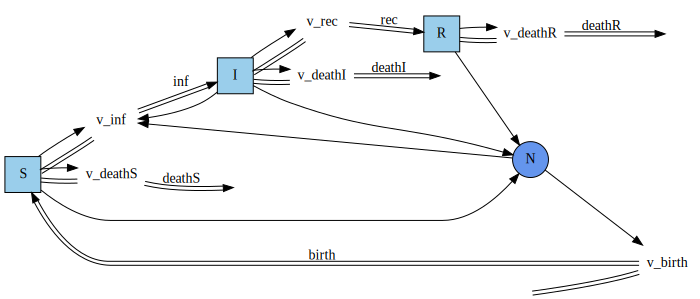

In [4]:
Graph(sir)

# Model B: Open population SVI model

In [5]:
f_vacc(u,uN,p,t)=u.S*p.rvaccine
f_deathV(u,uN,p,t)=u.V*p.rdeath
f_infv(u,uN,p,t)=p.cbeta*(1.0-p.evaccine)*u.V*u.I/uN.N(u,t)

f_infv (generic function with 1 method)

In [6]:
#(stock_name=>(inflows, outflows, variables, svariables))
     ## if a stock has no inflow or no outflow, use keyword ":F_NONE"
     ## if a stock has no variables connect to, use keyword ":V_NONE"
     ## if a stock has no sum_variables connect to, use keyword ":SV_NONE"
#(flow=>variable)
#(variable=>function)
#(svariable=>variable)
     ## if sum_variable contributes to no variables, use keywork ":SVV_NONE"
svi=StockAndFlow(
    (:S=>(:F_NONE,:vacc,:v_vacc,:N), 
        :V=>(:vacc,(:deathV,:infv),(:v_deathV, :v_infv),:N), 
        :I=>(:infv,:F_NONE,:V_NONE,:N)),
    (:vacc=>:v_vacc,:deathV=>:v_deathV, :infv=>:v_infv),
    (:v_vacc=>f_vacc,:v_deathV=>f_deathV,:v_infv=>f_infv),
    (:N=>:v_infv)
)

StockAndFlow with elements S = 1:3, SV = 1:1, LS = 1:3, F = 1:3, I = 1:2, O = 1:3, V = 1:3, LV = 1:3, LSV = 1:1
┌───┬───────┐
│ S │ sname │
├───┼───────┤
│ 1 │     S │
│ 2 │     V │
│ 3 │     I │
└───┴───────┘
┌────┬────────┐
│ SV │ svname │
├────┼────────┤
│  1 │      N │
└────┴────────┘
┌────┬─────┬──────┐
│ LS │ lss │ lssv │
├────┼─────┼──────┤
│  1 │   1 │    1 │
│  2 │   2 │    1 │
│  3 │   3 │    1 │
└────┴─────┴──────┘
┌───┬────┬────────┐
│ F │ fv │  fname │
├───┼────┼────────┤
│ 1 │  1 │   vacc │
│ 2 │  2 │ deathV │
│ 3 │  3 │   infv │
└───┴────┴────────┘
┌───┬─────┬────┐
│ I │ ifn │ is │
├───┼─────┼────┤
│ 1 │   1 │  2 │
│ 2 │   3 │  3 │
└───┴─────┴────┘
┌───┬─────┬────┐
│ O │ ofn │ os │
├───┼─────┼────┤
│ 1 │   1 │  1 │
│ 2 │   2 │  2 │
│ 3 │   3 │  2 │
└───┴─────┴────┘
┌───┬───────────┬──────────┐
│ V │ funcDynam │    vname │
├───┼───────────┼──────────┤
│ 1 │    f_vacc │   v_vacc │
│ 2 │  f_deathV │ v_deathV │
│ 3 │    f_infv │   v_infv │
└───┴───────────┴──────────┘
┌────┬─────┬─────┐
│ LV │ lvs │ lvv │
├────┼─────┼─────┤
│  1 │   1 │   1 │
│  2 │   2 │   2 │
│  3 │   2 │   3 │
└────┴─────┴─────┘
┌─────┬───────┬──────┐
│ LSV │ lsvsv │ lsvv │
├─────┼───────┼──────┤
│   1 │     1 │    3 │
└─────┴───────┴──────┘

# Composition 

## Using UWD-algebra

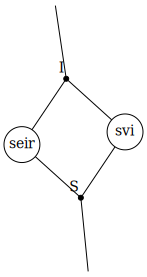

In [7]:
# define the UWD-algebra
sirv_uwd = @relation (S,I) begin
    seir(S,I)
    svi(S,I)
end;
display_uwd(sirv_uwd)

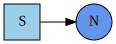

In [9]:
# define a foot of the structured multicospan
footS=foot(:S, :N, :S=>:N)
Graph(footS;schema="C0")

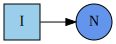

In [10]:
# define a foot of the structured multicospan
footI=foot(:I, :N, :I=>:N)
Graph(footI;schema="C0")

In [11]:
# open sir and svi stock and flow diagram with the feet defined before
open_sir=Open(sir, footS, footI)
open_svi=Open(svi, footS, footI)
# Compose those two models according the UWD-algebra
open_sirv = oapply(sirv_uwd, [open_sir, open_svi])
# the composed stock and flow diagram is the apex of the composed open stock and flow diagram
sirv = apex(open_sirv)

StockAndFlow with elements S = 1:4, SV = 1:1, LS = 1:4, F = 1:9, I = 1:5, O = 1:8, V = 1:9, LV = 1:9, LSV = 1:3
┌───┬───────┐
│ S │ sname │
├───┼───────┤
│ 1 │     S │
│ 2 │     I │
│ 3 │     R │
│ 4 │     V │
└───┴───────┘
┌────┬────────┐
│ SV │ svname │
├────┼────────┤
│  1 │      N │
└────┴────────┘
┌────┬─────┬──────┐
│ LS │ lss │ lssv │
├────┼─────┼──────┤
│  1 │   1 │    1 │
│  2 │   2 │    1 │
│  3 │   3 │    1 │
│  4 │   4 │    1 │
└────┴─────┴──────┘
┌───┬────┬────────┐
│ F │ fv │  fname │
├───┼────┼────────┤
│ 1 │  1 │  birth │
│ 2 │  2 │    inf │
│ 3 │  3 │    rec │
│ 4 │  4 │ deathS │
│ 5 │  5 │ deathI │
│ 6 │  6 │ deathR │
│ 7 │  7 │   vacc │
│ 8 │  8 │ deathV │
│ 9 │  9 │   infv │
└───┴────┴────────┘
┌───┬─────┬────┐
│ I │ ifn │ is │
├───┼─────┼────┤
│ 1 │   1 │  1 │
│ 2 │   2 │  2 │
│ 3 │   3 │  3 │
│ 4 │   7 │  4 │
│ 5 │   9 │  2 │
└───┴─────┴────┘
┌───┬─────┬────┐
│ O │ ofn │ os │
├───┼─────┼────┤
│ 1 │   2 │  1 │
│ 2 │   4 │  1 │
│ 3 │   3 │  2 │
│ 4 │   5 │  2 │
│ 5 │   6 │  3 │
│ 6 │   7 │  1 │
│ 7 │   8 │  4 │
│ 8 │   9 │  4 │
└───┴─────┴────┘
┌───┬───────────┬──────────┐
│ V │ funcDynam │    vname │
├───┼───────────┼──────────┤
│ 1 │   f_birth │  v_birth │
│ 2 │     f_inf │    v_inf │
│ 3 │     f_rec │    v_rec │
│ 4 │  f_deathS │ v_deathS │
│ 5 │  f_deathI │ v_deathI │
│ 6 │  f_deathR │ v_deathR │
│ 7 │    f_vacc │   v_vacc │
│ 8 │  f_deathV │ v_deathV │
│ 9 │    f_infv │   v_infv │
└───┴───────────┴──────────┘
┌────┬─────┬─────┐
│ LV │ lvs │ lvv │
├────┼─────┼─────┤
│  1 │   1 │   2 │
│  2 │   1 │   4 │
│  3 │   2 │   2 │
│  4 │   2 │   3 │
│  5 │   2 │   5 │
│  6 │   3 │   6 │
│  7 │   1 │   7 │
│  8 │   4 │   8 │
│  9 │   4 │   9 │
└────┴─────┴─────┘
┌─────┬───────┬──────┐
│ LSV │ lsvsv │ lsvv │
├─────┼───────┼──────┤
│   1 │     1 │    1 │
│   2 │     1 │    2 │
│   3 │     1 │    9 │
└─────┴───────┴──────┘

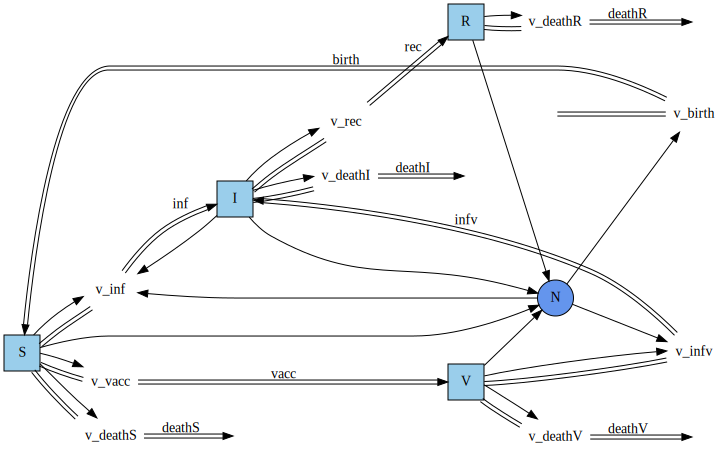

In [12]:
Graph(sirv)

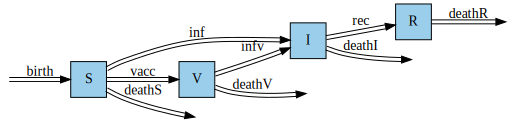

In [13]:
# we can only plot the stocks and flows to have 
Graph(sirv; type="SF")

In [14]:
# define values of constant parameters
p = LVector(
    cbeta=0.1, rbirth=0.001, rdeath=0.001, rrecovery=0.05, # for model sir
    rvaccine=0.01, evaccine=0.3 # for model svi
)
# define initial values for stocks
u0 = LVector(
    S=990.0, I=10.0, R=0.0, V=0.0
)

4-element LArray{Float64, 1, Vector{Float64}, (:S, :I, :R, :V)}:
 :S => 990.0
 :I => 10.0
 :R => 0.0
 :V => 0.0

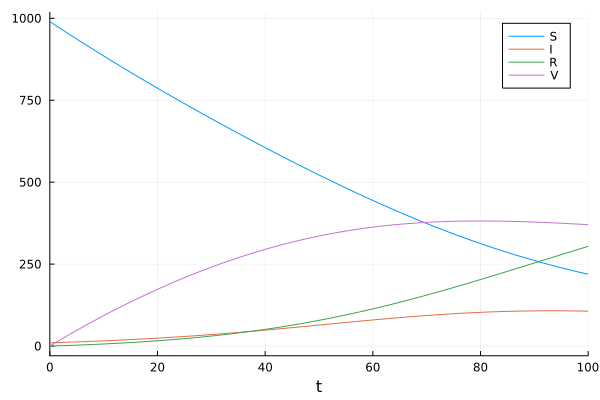

In [15]:
prob_sirv = ODEProblem(vectorfield(sirv),u0,(0.0,100.0),p);
sol_sirv = solve(prob_sirv,Tsit5(),abstol=1e-8);
plot(sol_sirv)